In [71]:
import matplotlib.pyplot as plt
from skimage import data, io, filters
from PIL import Image, ImageFilter
import math
import cv2
import numpy as np

In [72]:
def a_priori_m(img,mask):
    count = 0
    # Número de pixeles distinos a cero
    for i in range(len(mask)):
        for j in range(len(mask[i])):
            if np.mean(mask[i][j]) != 0:
                count += 1

    # A priori probability
    return count/(len(img)*len(img[0]))

### Previamente, se aplicó un filtro gaussiano a la imágen

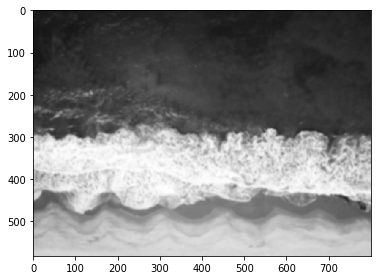

In [73]:
img = io.imread('.\\Imagenes\\fgauss.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
io.imshow(img_gray)

No. pixeles =  228000
(285, 800)


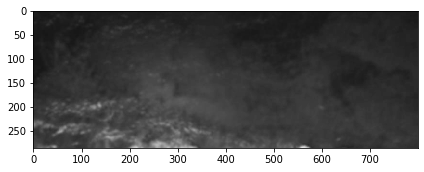

In [74]:
roi1 = img_gray[0:285, 0:800]
io.imshow(roi1)

pixRoi1 = 0
for i in range(len(roi1)):
    for j in range(len(roi1[i])):
        pixRoi1 = pixRoi1 + 1
print("No. pixeles = ", pixRoi1)
print(roi1.shape)

No. pixeles =  131200


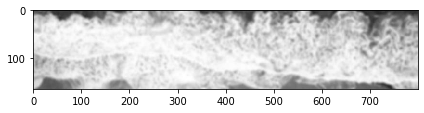

In [75]:
roi2 = img_gray[286:450, 0:800]
io.imshow(roi2)

pixRoi2 = 0
for i in range(len(roi2)):
    for j in range(len(roi2[i])):
        pixRoi2 = pixRoi2 + 1
print("No. pixeles = ", pixRoi2)

No. pixeles =  105600


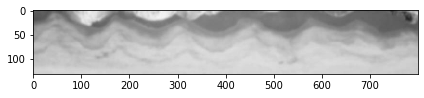

In [76]:
roi3 = img_gray[450:582, 0:800]
io.imshow(roi3)

pixRoi3 = 0
for i in range(len(roi3)):
    for j in range(len(roi3[i])):
        pixRoi3 = pixRoi3 + 1
print("No. pixeles = ", pixRoi3)

## Varianza
Al ser una imágen en blanco y negro, se calcula únicamente la varianza

In [77]:
roi1_var = np.var(roi1)
roi2_var = np.var(roi2)
roi3_var = np.var(roi3)

roi_var = np.zeros(3)
roi_var[0] = roi1_var
roi_var[1] = roi2_var
roi_var[2] = roi3_var

print(roi_var)

#roi_cov = []
#roi_cov.append(np.cov(roi1))
#roi_cov.append(np.cov(roi2))
#roi_cov.append(np.cov(roi3))
#print(roi_cov)

[ 368.56922847 2077.87664725 1429.63622374]


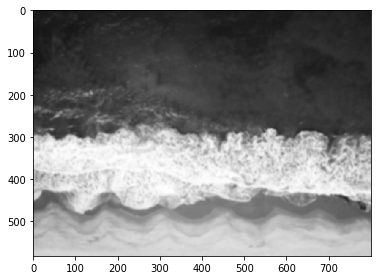

In [78]:
imgResult = img_gray.copy()
io.imshow(imgResult)

In [79]:
ROI_media = [0,0,0]
ROI_media[0] = np.mean(roi1)
ROI_media[1] = np.mean(roi2)
ROI_media[2] = np.mean(roi3)
ROI_media

[52.53019736842105, 203.34853658536585, 176.23666666666668]

207719 193033 64848


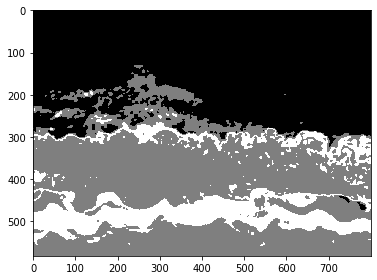

In [80]:
c0, c1, c2 = 0, 0, 0
for i in range(len(img_gray)):
    for j in range(len(img_gray[i])):
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = img_gray[i][j]
            denominador = 1/(math.sqrt(2 * math.pi) * roi_var[k])
            cociente_Exp = (((x - ROI_media[k]) * (x-ROI_media[k])) / (2 * (roi_var[k]) * (roi_var[k])))
            exp = math.exp(-cociente_Exp)
            y[k] = cociente * exp
        
        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            imgResult[i][j] = 0

        elif classif == 1:
            c1 +=1
            imgResult[i][j] = 127
            
        elif classif == 2:
            c2 += 1
            imgResult[i][j] = 255

            
print(c0, c1, c2)
io.imshow(imgResult)

### Prueba 1

417


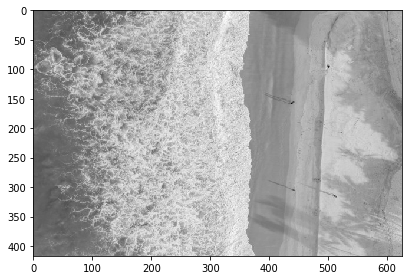

In [81]:
img2 = io.imread('.\\Imagenes\\img4.jpg')
test = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
prueba = test.copy()
io.imshow(prueba)
print(len(test))

14 113873 147155


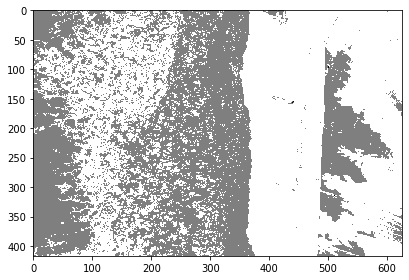

In [82]:
c0, c1, c2 = 0, 0, 0
for i in range(len(prueba)):
    for j in range(len(prueba[i])):
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = prueba[i][j]
            denominador = 1/(math.sqrt(2 * math.pi) * roi_var[k])
            cociente_Exp = (((x - ROI_media[k]) * (x-ROI_media[k])) / (2 * (roi_var[k]) * (roi_var[k])))
            exp = math.exp(-cociente_Exp)
            y[k] = cociente * exp
        
        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            prueba[i][j] = 0

        elif classif == 1:
            c1 +=1
            prueba[i][j] = 127
            
        elif classif == 2:
            c2 += 1
            prueba[i][j] = 255

            
print(c0, c1, c2)
io.imshow(prueba)

### Prueba 2

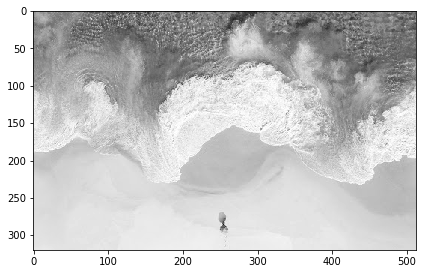

In [83]:
img3 = io.imread('.\\Imagenes\\Img1.jpg')
test2 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
prueba2 = test2.copy()
io.imshow(prueba2)

789 116222 46829


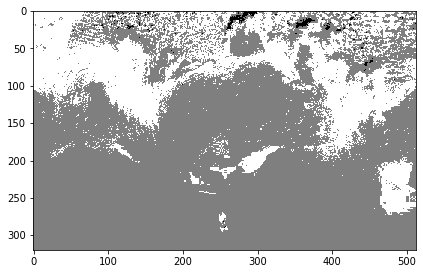

In [84]:
c0, c1, c2 = 0, 0, 0
for i in range(len(prueba2)):
    for j in range(len(prueba2[i])):
        y = [0,0,0]
        for k in range(len(ROI_media)):
            x = prueba2[i][j]
            denominador = 1/(math.sqrt(2 * math.pi) * roi_var[k])
            cociente_Exp = (((x - ROI_media[k]) * (x-ROI_media[k])) / (2 * (roi_var[k]) * (roi_var[k])))
            exp = math.exp(-cociente_Exp)
            y[k] = cociente * exp
        
        classif = y.index(max(y))
        if classif == 0:
            c0 +=1
            prueba2[i][j] = 0

        elif classif == 1:
            c1 +=1
            prueba2[i][j] = 127
            
        elif classif == 2:
            c2 += 1
            prueba2[i][j] = 255

            
print(c0, c1, c2)
io.imshow(prueba2)